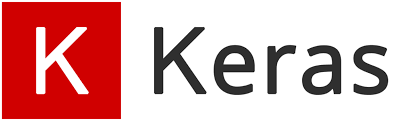

## What is Keras?



1.  **Deep learning library:**\
Keras is a deep learning framework - high level API which runs on the top of Tensorflow, Theano or CNTK.
2.   **Keras Modular:**\
Building model is as simple as stacking layer and connecting graphs.
3. **Open Sourc**e:\
Good amount of documentation.
4. High performance:\
High performing API used to specify and train differentiable programs.



## Working principle of Keras



1.   Expressing complex expressions as a combination of simple operations
2.   Useful for calculating derivatives during backpropagation
3. Easier to implement distributed computation
4. Just specify the inputs, outputs and make sure the graph is connected



## ANN Mimics Biological Neuron

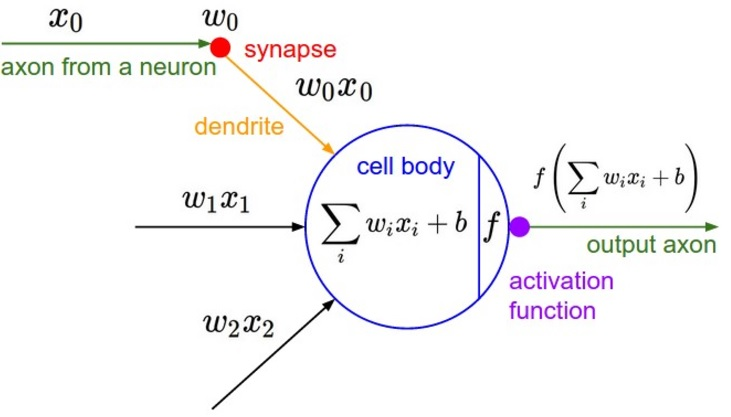

## Why Neural Nets?
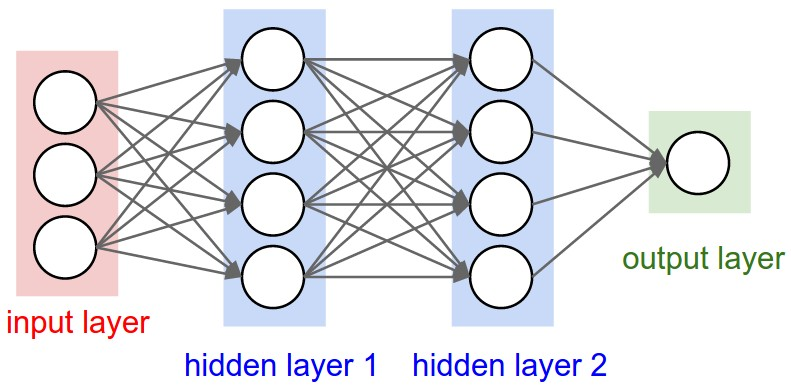




More layers can encapsulate more knowledge.

More weights to train – need more data, need more computation.

## Implementation of a Neural Network:



### 1. Prepare the Input:
- Prepare the input and specify the input dimension.
- Images,videos,text,audio.

### 2. Define the ANN Model:
- Define the model architecture and build the computational graph.
- Sequential or functional API.
- MLP, CNN, RNN.

### 3. Optimizer:
- Specify the optimizer and configure the learning process.
- SGD, RMSprop, Adam.

### 4. Loss Function:
- Specify the inputs, outputs of the computational graph(model) and the loss function.
- MSE, cross-entropy.

### 5. Train and Evaluate the Model:
- Train the model based on the training data.
- Test the model on the dataset with the testing data.

## Different architectures:

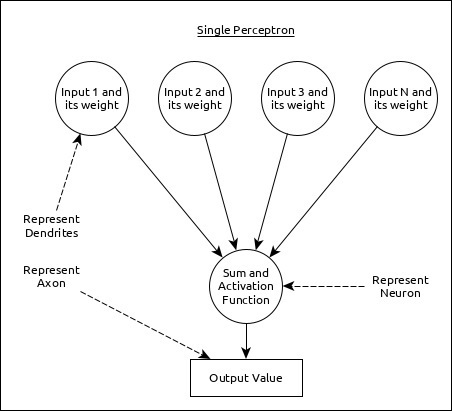

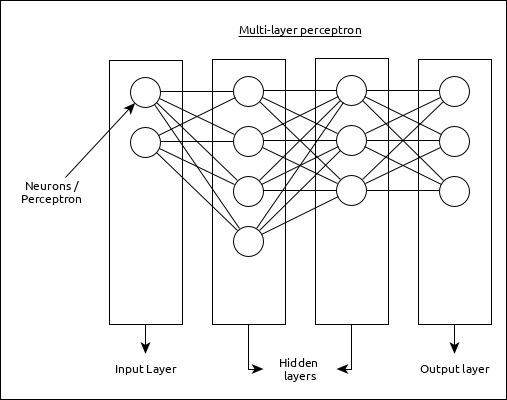

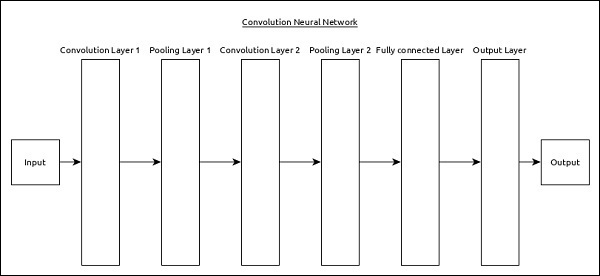

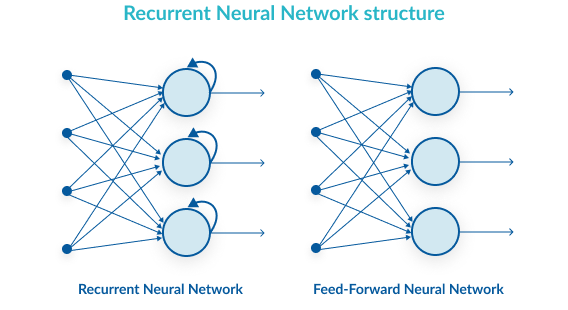

## Types of Keras APIs:

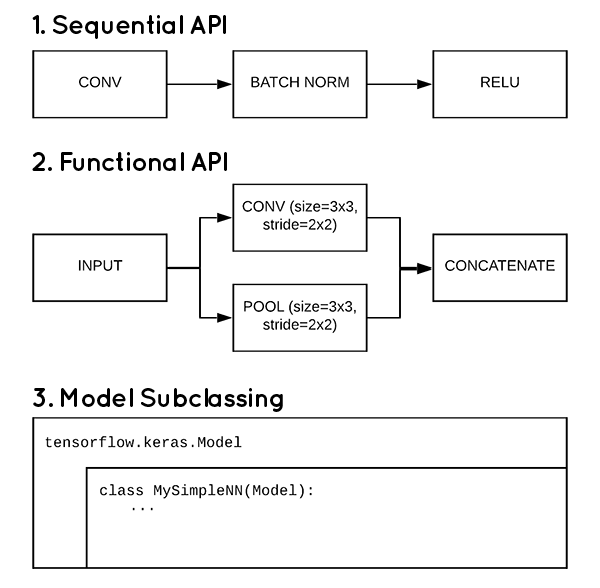



## Execution Types:

1. **Deferred (symbolic):**
- We use python to build a computational graph first.
- The compiled graph then gets executed later.

2. Eager (imperative):
- Here, the python runtime is the execution runtime.
- It is similar to execution with Numpy


Symbolic tensors don't have a value in the python code (yet).\
Eager tensors have a value in the python code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

OSError: data.csv not found.

In [ ]:
print(dataset.shape,X.shape,y.shape)

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Note:Compile defines the loss function, the optimizer and the metrics. It has nothing to do with the weights and you can compile a model as many times as you want without causing any problem to pretrained weights. You need a compiled model to train (because training uses the loss function and the optimizer)

Note:Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. A model that is well-fitted produces more accurate outcomes. A model that is overfitted matches the data too closely. It gives us the history callback

In [ ]:
# fit the keras model on the dataset
model.fit(X, y, epochs=10, batch_size=10)

Note:The model. evaluate function predicts the output for the given input and then computes the metrics function specified in the model.

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.6875
Accuracy: 68.75


In [ ]:
import numpy as np
import pandas as pd
#dataset import
dataset = pd.read_csv('train.csv')
dataset.head(5) #Return 5 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [ ]:
for col in dataset:
    print(dataset[col].unique())

[ 842 1021  563 ... 1139 1467  858]
[0 1]
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
[0 1]
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
[0 1]
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 193 169 120 149 186 122 167]
[2 3 5 6 1 8 4 7]
[ 2  6  9 14  7 10  0 15  1 18 1

In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64)
model.summary()

Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 1.4014 - accuracy: 0.2783
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 1.3548 - accuracy: 0.3289
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 1.3236 - accuracy: 0.3493
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 1.2798 - accuracy: 0.3929
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 1.2238 - accuracy: 0.4414
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 1.1425 - accuracy: 0.4909
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 1.0622 - accuracy: 0.5446
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9691 - accuracy: 0.5803
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.8951 - accuracy: 0.6171
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.8230 - accuracy: 0.6529
Model: "sequential_

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 68.25


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test, pred)
cm

array([[86,  8,  0,  0],
       [39, 36, 18,  0],
       [ 2, 16, 60, 37],
       [ 0,  0,  7, 91]])

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10, batch_size=64)
model.summary()

Epoch 1/10
25/25 [==============================] - 0s 11ms/step - loss: 0.7408 - accuracy: 0.6950 - val_loss: 0.7476 - val_accuracy: 0.7075
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.7325 - val_loss: 0.6916 - val_accuracy: 0.7425
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.7650 - val_loss: 0.6427 - val_accuracy: 0.7550
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.8000 - val_loss: 0.5984 - val_accuracy: 0.7825
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.8238 - val_loss: 0.5582 - val_accuracy: 0.8025
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.8419 - val_loss: 0.5230 - val_accuracy: 0.8175
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8581 - val_loss: 0.4915 - val_accuracy: 0.8400
Epoch 8/10
25/25 [=

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
plt.style.use('ggplot')

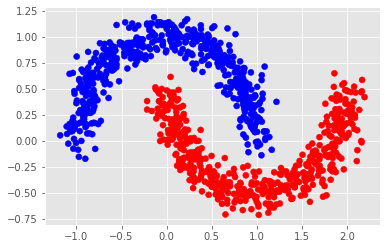

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
from sklearn import datasets
import matplotlib.pyplot as plt
n_samples =1000
x, y = datasets.make_moons(n_samples=n_samples, noise=0.1)
cols = ['b', 'r', 'g', 'm', 'c']
col= [cols[int(i)] for i in y]
plt.scatter(x[:,0], x[:,1], color=col)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109)

In [5]:
# Hyper-parameters
training_epochs = 10
learning_rate = 0.03

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [7]:
from keras.utils import np_utils
num_classes = 2
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(700, 2) (700, 2) (300, 2) (300, 2)


In [8]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(4, input_dim=2, kernel_initializer='normal', activation='tanh'))
  # Hidden layer
  model.add(Dense(6, activation='relu'))
  # Output layer
  model.add(Dense(2, activation='sigmoid'))
 
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
  return model

In [9]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [10]:
# training 
results = model.fit(
 X_train, y_train,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test))

Epoch 1/10
2/2 [==============================] - 13s 496ms/step - loss: 0.6995 - accuracy: 0.2287 - val_loss: 0.6882 - val_accuracy: 0.7967
Epoch 2/10
2/2 [==============================] - 0s 26ms/step - loss: 0.6872 - accuracy: 0.7943 - val_loss: 0.6713 - val_accuracy: 0.8500
Epoch 3/10
2/2 [==============================] - 0s 20ms/step - loss: 0.6680 - accuracy: 0.8455 - val_loss: 0.6381 - val_accuracy: 0.8167
Epoch 4/10
2/2 [==============================] - 0s 19ms/step - loss: 0.6326 - accuracy: 0.8058 - val_loss: 0.5837 - val_accuracy: 0.8167
Epoch 5/10
2/2 [==============================] - 0s 19ms/step - loss: 0.5772 - accuracy: 0.8065 - val_loss: 0.5133 - val_accuracy: 0.8367
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 0.5049 - accuracy: 0.8257 - val_loss: 0.4403 - val_accuracy: 0.8433
Epoch 7/10
2/2 [==============================] - 0s 21ms/step - loss: 0.4377 - accuracy: 0.8202 - val_loss: 0.3784 - val_accuracy: 0.8433
Epoch 8/10
2/2 [=========

In [11]:
# evaluate the model
prediction_values = model.predict_classes(X_test)
scores = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


10/10 [==============================] - 0s 798us/step - loss: 0.2896 - accuracy: 0.8733

accuracy: 87.33%


In [12]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

Input layer weights (2, 4) :
 [[-0.4393455  -0.15171888  0.39784977  0.40123942]
 [ 0.38447237  0.30211684 -0.61075735 -0.507973  ]]
Input layer biases (4,) :
 [ 0.19820878 -0.4523375  -0.11581295  0.12500319]

Hidden layer weights (4, 6) :
 [[ 0.27322966  0.829102    0.96800643 -1.0234101   0.01326367  0.29692245]
 [-0.9855465  -0.27729073  0.76939136 -0.05135388  0.11629189  0.53039616]
 [ 0.65117145 -1.0457857  -0.4803421   0.39762592  0.01054278 -0.02254322]
 [ 0.4926238  -0.7407715  -1.0710293   0.86575514 -0.27242506  0.24272434]]
Hidden layer biases (6,) :
 [ 0.34794176  0.35560405  0.5116421   0.3064382  -0.38748705 -0.21628365]

Output layer weights (6, 2) :
 [[-0.67107594  0.8121276 ]
 [ 0.72839755 -0.8610021 ]
 [ 0.37350407 -0.84663445]
 [-1.0199214   0.9809846 ]
 [ 0.2615171   0.01209066]
 [-0.64108795 -0.64593655]]
Output layer biases (2,) :
 [0.1022055  0.19409174]


In [13]:
print(model.metrics_names[:])
scores

['loss', 'accuracy']


[0.28960081934928894, 0.8733333349227905]